<a href="https://colab.research.google.com/github/Sachinsatya/Adani_Ent_stock_price_prediction_usingML/blob/main/Adani_Ent_stock_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

STOCK PRICE PREDICTION Using Regression and Deep Learning Algorithms


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf
import datetime
import warnings
warnings.filterwarnings('ignore')


In [4]:
 df = yf.download("ADANIENT.NS", start="2020-01-01", end="2023-02-12")
df

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-01,209.000000,210.449997,206.649994,207.850006,206.116074,1553127
2020-01-02,208.000000,213.199997,207.500000,211.199997,209.438110,2991937
2020-01-03,210.250000,212.350006,205.800003,208.300003,206.562302,2512421
2020-01-06,207.750000,207.750000,197.750000,199.550003,197.885300,4353179
2020-01-07,200.550003,205.699997,200.550003,204.050003,202.347778,2966120
...,...,...,...,...,...,...
2023-02-06,1575.000000,1615.000000,1435.199951,1572.699951,1572.699951,19308603
2023-02-07,1571.000000,1962.699951,1525.599976,1802.949951,1802.949951,19188072
2023-02-08,1869.849976,2222.149902,1840.849976,2164.250000,2164.250000,19173006


In [5]:
df = df.round(2)

In [6]:
df.head(3)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-01,209.00,210.45,206.65,207.85,206.12,1553127
2020-01-02,208.00,213.20,207.50,211.20,209.44,2991937
2020-01-03,210.25,212.35,205.80,208.30,206.56,2512421


In [7]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-02-06,1575.00,1615.00,1435.20,1572.70,1572.70,19308603
2023-02-07,1571.00,1962.70,1525.60,1802.95,1802.95,19188072
2023-02-08,1869.85,2222.15,1840.85,2164.25,2164.25,19173006
2023-02-09,2168.00,2168.00,1731.40,1925.70,1925.70,18279862
2023-02-10,1769.00,1990.00,1733.15,1846.95,1846.95,11334878


In [8]:
df.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [9]:
df.dtypes

Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

In [10]:
df.duplicated().sum()                              #To Check Duplicated Value

0

In [11]:
df.isnull().sum()                                  #To Check Null Value

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 776 entries, 2020-01-01 to 2023-02-10
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       776 non-null    float64
 1   High       776 non-null    float64
 2   Low        776 non-null    float64
 3   Close      776 non-null    float64
 4   Adj Close  776 non-null    float64
 5   Volume     776 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 42.4 KB


In [13]:
df.shape

(776, 6)

Basic statistic of the  Data Frame

In [14]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,776.000000,776.000000,776.000000,776.000000,776.000000,7.760000e+02
mean,1457.520941,1484.426740,1427.072358,1456.515851,1455.890941,4.753229e+06
std,1157.218274,1172.336313,1135.864261,1154.038099,1154.213288,5.389994e+06
min,121.000000,129.800000,116.400000,120.900000,120.770000,2.482490e+05
25%,312.587500,319.112500,307.012500,312.750000,312.410000,1.714098e+06
50%,1443.925000,1474.375000,1415.175000,1442.225000,1441.615000,3.077650e+06
75%,2136.037500,2176.250000,2076.287500,2111.450000,2110.550000,5.361654e+06
max,4175.000000,4190.000000,4066.400000,4165.300000,4165.300000,4.926454e+07


In [15]:
df.nunique

<bound method DataFrame.nunique of                Open     High      Low    Close  Adj Close    Volume
Date                                                               
2020-01-01   209.00   210.45   206.65   207.85     206.12   1553127
2020-01-02   208.00   213.20   207.50   211.20     209.44   2991937
2020-01-03   210.25   212.35   205.80   208.30     206.56   2512421
2020-01-06   207.75   207.75   197.75   199.55     197.89   4353179
2020-01-07   200.55   205.70   200.55   204.05     202.35   2966120
...             ...      ...      ...      ...        ...       ...
2023-02-06  1575.00  1615.00  1435.20  1572.70    1572.70  19308603
2023-02-07  1571.00  1962.70  1525.60  1802.95    1802.95  19188072
2023-02-08  1869.85  2222.15  1840.85  2164.25    2164.25  19173006
2023-02-09  2168.00  2168.00  1731.40  1925.70    1925.70  18279862
2023-02-10  1769.00  1990.00  1733.15  1846.95    1846.95  11334878

[776 rows x 6 columns]>

In [16]:
df['Date'] = df.index

In [17]:
df

,Open,High,Low,Close,Adj Close,Volume,Date
Date,,,,,,,
2020-01-01,209.00,210.45,206.65,207.85,206.12,1553127,2020-01-01
2020-01-02,208.00,213.20,207.50,211.20,209.44,2991937,2020-01-02
2020-01-03,210.25,212.35,205.80,208.30,206.56,2512421,2020-01-03
2020-01-06,207.75,207.75,197.75,199.55,197.89,4353179,2020-01-06
2020-01-07,200.55,205.70,200.55,204.05,202.35,2966120,2020-01-07
...,...,...,...,...,...,...,...
2023-02-06,1575.00,1615.00,1435.20,1572.70,1572.70,19308603,2023-02-06
2023-02-07,1571.00,1962.70,1525.60,1802.95,1802.95,19188072,2023-02-07
2023-02-08,1869.85,2222.15,1840.85,2164.25,2164.25,19173006,2023-02-08


Check rage of data as per DATE

In [18]:
print("Starting date: ",df.iloc[0][-1])
print("Ending date: ", df.iloc[-1][-1])
print("Duration: ", df.iloc[-1][-1]-df.iloc[0][-1])

Starting date:  2020-01-01 00:00:00
Ending date:  2023-02-10 00:00:00
Duration:  1136 days 00:00:00


Monthly data

In [19]:
monthvise= df.groupby(df['Date'].dt.strftime('%B'))[['Open','Close']].mean().sort_values(by='Close')

In [20]:
monthvise

,Open,Close
Date,,
March,951.176190,955.553175
February,1023.341791,1009.479104
April,1184.605357,1189.132143
May,1235.105000,1230.002500
June,1284.721212,1285.371212
July,1289.846154,1291.502308
January,1501.656548,1490.852976
August,1508.315323,1519.850000
October,1667.537500,1660.111667


Text(0.5, 1.0, 'Monthwise comparision between Stock open and close price')

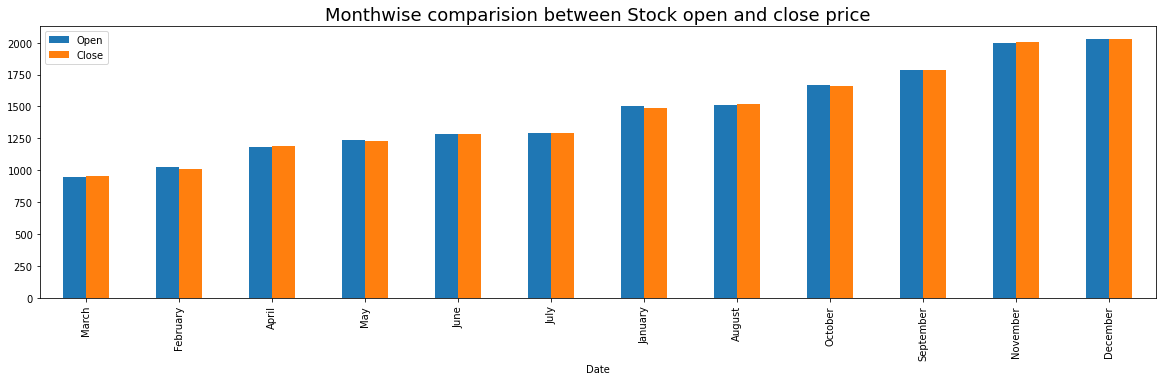

In [21]:
monthvise.plot(kind = 'bar', figsize = (20,5))
plt.title("Monthwise comparision between Stock open and close price", fontsize = 18)

Minimum low price in each month

In [22]:
df.groupby(df['Date'].dt.strftime('%B'))['Low'].min()

Date
April        128.00
August       171.20
December     395.10
February     215.60
January      194.55
July         145.20
June         141.00
March        116.40
May          127.30
November     333.05
October      296.00
September    257.50
Name: Low, dtype: float64

Maximum low price in each month

In [23]:
df.groupby(df['Date'].dt.strftime('%B'))['Low'].max()


Date
April        2336.30
August       3161.00
December     4066.40
February     1941.20
January      3822.55
July         2560.00
June         2207.05
March        1991.00
May          2311.00
November     4022.00
October      3326.10
September    3812.00
Name: Low, dtype: float64

Minimum high price in each month

In [24]:
df.groupby(df['Date'].dt.strftime('%B'))['High'].min()

Date
April        134.60
August       178.70
December     423.95
February     224.65
January      203.55
July         150.00
June         148.45
March        129.80
May          135.40
November     344.30
October      311.95
September    281.25
Name: High, dtype: float64

Maximum high price in each month

In [25]:
 df.groupby(df['Date'].dt.strftime('%B'))['High'].max()

Date
April        2420.95
August       3263.10
December     4190.00
February     3010.75
January      3880.00
July         2622.00
June         2274.00
March        2042.00
May          2362.90
November     4096.00
October      3460.05
September    3885.00
Name: High, dtype: float64

In [26]:
monthvise['monthvise_high']= df.groupby(df['Date'].dt.strftime('%B'))['High'].max()
monthvise['monthvise_low']= df.groupby(df['Date'].dt.strftime('%B'))['Low'].min()

Text(0.5, 1.0, 'Monthwise High and Low stock price')

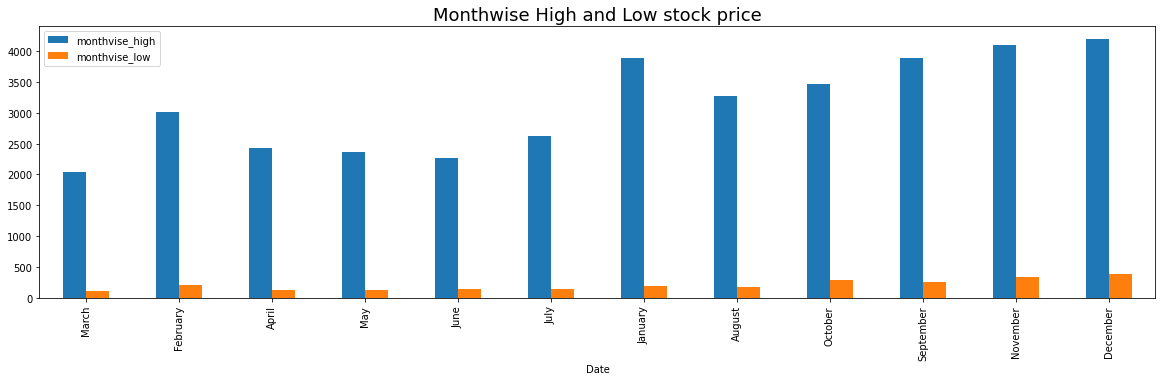

In [27]:
monthvise[['monthvise_high', 'monthvise_low']].plot(kind = 'bar', figsize=(20,5))
plt.title("Monthwise High and Low stock price", fontsize = 18)

Text(0.5, 1.0, 'Stock analysis chart')

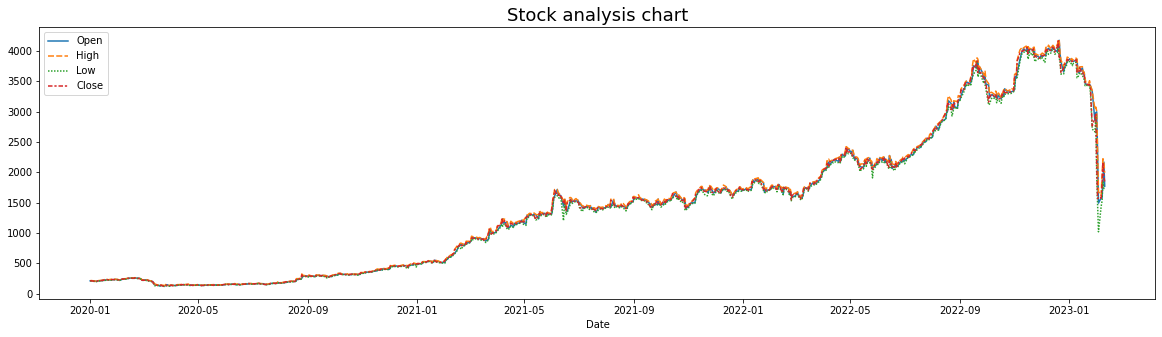

In [28]:
plt.figure(figsize=(20,5))
sns.lineplot(data=df[['Open','High','Low','Close']])
plt.title("Stock analysis chart",fontsize=18)

In [29]:
closedf = df[['Date','Close']]
print("Shape of close dataframe:", closedf.shape)


Shape of close dataframe: (776, 2)


Text(0.5, 1.0, 'Stock close price chart')

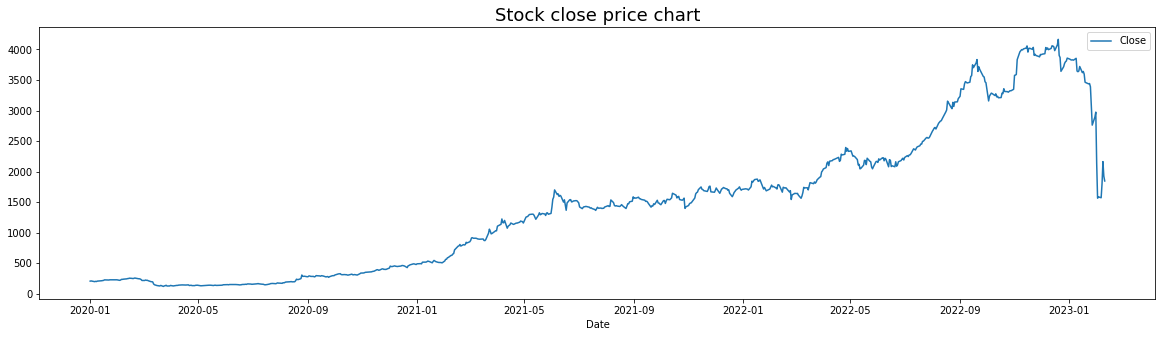

In [30]:
plt.figure(figsize=(20,5))
sns.lineplot(data=closedf)
plt.title("Stock close price chart",fontsize=18)


Evaluation Metrics

---------------------------------------------------
mean_squared_error:-
---------------------------------------------------

This is a metric that measures the average squared difference between the predicted and actual values. It is calculated as the mean of the squared differences between the predicted and actual values. This metric is useful
for penalizing large errors in the predictions, and is commonly used as a loss function during training. However, it can be sensitive to outliers and does not provide an easily interpretable measure of error in the original
units of the response variable.


mean_absolute_error:
------------------------------------------------------------------------------------------------------------------------------
This is a metric that measures the average absolute difference between the predicted and actual values. It is calculated as the mean of the absolute differences between the predicted and actual values. This metric
provides an easily interpretable measure of error in the original units of the response variable, and is less sensitive to outliers than the mean squared error.


explained_variance_score:
----------------------------------------------------------------------------------
This is a metric that measures the proportion of variance in the target variable that is explained by the model. It is calculated as 1 - (variance of residuals / variance of target variable). This metric provides an indication of
how well the model fits the data and can be interpreted as the amount of information captured by the model.

r2_score:
-----------------
This is a metric that measures the proportion of variance in the target variable that is explained by the model, normalized by the total variance in the target variable. It is calculated as 1 - (sum of squared residuals / total
sum of squares). This metric provides a normalized indication of how well the model fits the data, and can be interpreted as the percentage of variance in the target variable that is explained by the model. It ranges from 0
to 1, with 1 indicating a perfect fit and values close to 0 indicating poor performance.

mean_poisson_deviance:
-------------------
It is a metric that measures the goodness of fit of a Poisson regression model. It compares the predicted values of the model with the observed values and calculates the mean deviation of the predicted values from the
observed values. A lower value of this metric indicates a better fit of the model to the data.

mean_gamma_deviance:
-----
It is a metric that measures the goodness of fit of a Gamma regression model. It compares the predicted values of the model with the observed values and calculates the mean deviation of the predicted values from the
observed values. A lower value of this metric indicates a better fit of the model to the data.


accuracy_score:
-----------
It is a metric used to evaluate the performance of a classification model. It calculates the proportion of correctly predicted labels to the total number of samples. A higher value of this metric indicates a better classification
performance of the model.

Scaling
--
MinMaxScaler:
-----------------
MinMaxScaler is a technique used in data preprocessing to scale and transform features or variables of a dataset to a particular range, usually between 0 and 1. This technique helps to normalize the data and make it
more consistent, making it easier to compare and analyze the data.
MinMaxScaler is a simple linear scaling technique that works by subtracting the minimum value of the feature and then dividing by the range (i.e., the difference between the maximum and minimum values) of the feature.
The resulting values are then rescaled to fit within the desired range.


MinMaxScaler is commonly used in machine learning algorithms, especially in algorithms that involve distance calculations or optimization, such as clustering, gradient descent, and neural networks. It helps to improve the
performance of the algorithms by reducing the influence of the scale of the variables on the model.


In [31]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score, r2_score
from sklearn.metrics import mean_poisson_deviance, mean_gamma_deviance, accuracy_score
from sklearn.preprocessing import MinMaxScaler

Model Creation
-

In [32]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM, GRU


In [33]:
close_stock = closedf.copy()
del closedf['Date']
scaler=MinMaxScaler(feature_range=(0,1))
closedf=scaler.fit_transform(np.array(closedf).reshape(-1,1))
print(closedf.shape)


(776, 1)


In [34]:
training_size=int(len(closedf)*0.75)
test_size=len(closedf)-training_size
train_data,test_data=closedf[0:training_size,:],closedf[training_size:len(closedf),:1]
print("train_data: ", train_data.shape)
print("test_data: ", test_data.shape)
# print(train_data)
# print(test_data)

train_data:  (582, 1)
test_data:  (194, 1)


# convert an array of values into a dataset matrix
-----------------
"""
This function creates a sliding window of size time_step over the input dataset and constructs a set of input-output pairs for training a time series forecasting model.
The input matrix dataX contains n rows, where n is the number of time steps in the input sequence, and time_step columns, representing the past time_step values of the
input sequence. The output matrix dataY contains n rows and 1 column,representing the next value in the sequence to be predicted.
"""

In [36]:
def create_dataset(dataset, time_step=1):
 dataX, dataY = [], []
 for i in range(len(dataset)-time_step-1):
      a = dataset[i:(i+time_step), 0]                                     #i=0, 0,1,2,3-----99 100
      dataX.append(a)
      dataY.append(dataset[i + time_step, 0])
 return np.array(dataX), np.array(dataY)

In [37]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 15
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)
print("X_train: ", X_train.shape)
print("y_train: ", y_train.shape)
print("X_test: ", X_test.shape)
print("y_test", y_test.shape)


X_train:  (566, 15)
y_train:  (566,)
X_test:  (178, 15)
y_test (178,)


Support Vector Regressor
-------------
Support Vector Regressor (SVR) is a machine learning algorithm used for regression analysis. It is an extension of the popular Support Vector Machine (SVM) algorithm used for classification problems.

SVR tries to fit a line or a curve through the data points in such a way that the margin between the predicted values and the actual values is minimized. The algorithm does this by identifying the support vectors, which are
the data points closest to the line or curve being fitted, and using them to optimize the margin.

SVR is particularly useful when dealing with nonlinear data, as it is able to transform the data into a higher dimensional space, where it can be more easily separated. It is also highly effective in dealing with noisy data, as
it is able to effectively filter out the noise and identify the underlying trends in the data.

In summary, SVR is a powerful regression algorithm that is highly effective in dealing with nonlinear and noisy data, making it a valuable tool for data scientists and machine learning practitioners.

In [39]:
from sklearn.svm import SVR
svr_rbf = SVR(kernel= 'rbf', C= 1e2, gamma= 0.1)
svr_rbf.fit(X_train, y_train)

SVR(C=100.0, gamma=0.1)

In [40]:
# Lets Do the prediction
train_predict =svr_rbf.predict(X_train)
test_predict=svr_rbf.predict(X_test)
print(train_predict.shape)
print(test_predict.shape)
train_predict = train_predict.reshape(-1,1)
test_predict = test_predict.reshape(-1,1)
print("Train data prediction:", train_predict.shape)
print("Test data prediction:", test_predict.shape)


(566,)
(178,)
Train data prediction: (566, 1)
Test data prediction: (178, 1)


In [42]:
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)
print(train_predict.shape)
print(test_predict.shape)
# print(train_predict)
original_ytrain = scaler.inverse_transform(y_train.reshape(-1,1))
original_ytest = scaler.inverse_transform(y_test.reshape(-1,1))
print(original_ytrain.shape)
print(original_ytest.shape)


(566, 1)
(178, 1)
(566, 1)
(178, 1)


In [43]:
 # Evaluation metrices RMSE and MAE
print("---------------------------------------------------------------------------------------------------------")
print("Train data RMSE: ", np.sqrt(mean_squared_error(original_ytrain,train_predict)))
print("Train data MSE: ", mean_squared_error(original_ytrain,train_predict))
print("Test data MAE: ", mean_absolute_error(original_ytrain,train_predict))
print("---------------------------------------------------------------------------------------------------------")
print("Test data RMSE: ", np.sqrt(mean_squared_error(original_ytest,test_predict)))
print("Test data MSE: ", mean_squared_error(original_ytest,test_predict))
print("Test data MAE: ", mean_absolute_error(original_ytest,test_predict))
print("---------------------------------------------------------------------------------------------------------")
print("Train data explained variance regression score:", explained_variance_score(original_ytrain, train_predict))
print("Test data explained variance regression score:", explained_variance_score(original_ytest, test_predict))
print("---------------------------------------------------------------------------------------------------------")
print("Train data R2 score:", r2_score(original_ytrain, train_predict))
print("Test data R2 score:", r2_score(original_ytest, test_predict))
print("---------------------------------------------------------------------------------------------------------")
print("Train data MGD: ", mean_gamma_deviance(original_ytrain, train_predict))
print("Test data MGD: ", mean_gamma_deviance(original_ytest, test_predict))
print("---------------------------------------------------------------------------------------------------------")
print("Train data MPD: ", mean_poisson_deviance(original_ytrain, train_predict))
print("Test data MPD: ", mean_poisson_deviance(original_ytest, test_predict))
print("---------------------------------------------------------------------------------------------------------")


---------------------------------------------------------------------------------------------------------
Train data RMSE:  223.56371663422217
Train data MSE:  49980.73539530679
Test data MAE:  182.52147205638119
---------------------------------------------------------------------------------------------------------
Test data RMSE:  1018.6151462017375
Test data MSE:  1037576.816071587
Test data MAE:  891.8595375886738
---------------------------------------------------------------------------------------------------------
Train data explained variance regression score: 0.9203253647034753
Test data explained variance regression score: 0.3674685081234186
---------------------------------------------------------------------------------------------------------
Train data R2 score: 0.8899002291580416
Test data R2 score: -1.134778818453622
---------------------------------------------------------------------------------------------------------
Train data MGD:  0.27937958841738786
Test data 

Text(0.5, 1.0, 'Stock close price chart')

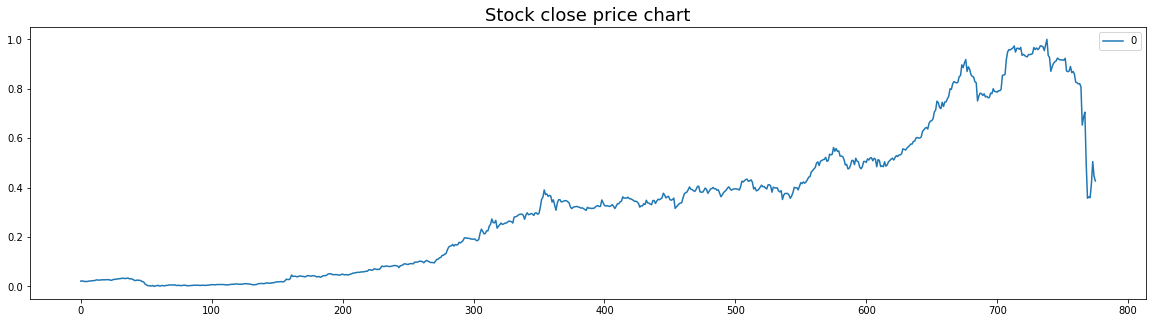

In [44]:
plt.figure(figsize=(20,5))
sns.lineplot(data=closedf)
plt.title("Stock close price chart",fontsize=18)


Train predicted data:  (776, 1)
Test predicted data:  (776, 1)


Text(0.5, 1.0, 'Stock close price chart')

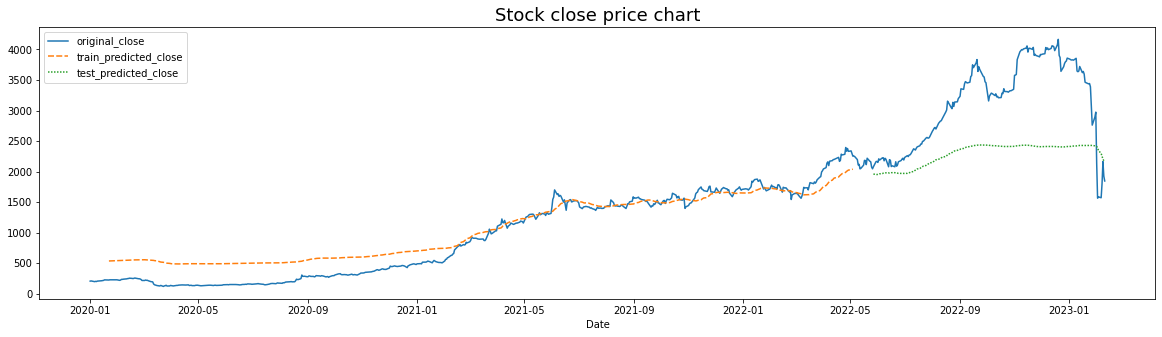

In [46]:
# shift train predictions for plotting
look_back=time_step
trainPredictPlot = np.empty_like(closedf)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
print("Train predicted data: ", trainPredictPlot.shape)

# shift test predictions for plotting
testPredictPlot = np.empty_like(closedf)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(closedf)-1, :] = test_predict
print("Test predicted data: ", testPredictPlot.shape)
plotdf = pd.DataFrame({'Date': close_stock['Date'],'original_close': close_stock['Close'],'train_predicted_close': trainPredictPlot.reshape(1,-1)[0].tolist(),
 'test_predicted_close': testPredictPlot.reshape(1,-1)[0].tolist()})

plt.figure(figsize=(20,5))
sns.lineplot(data=plotdf)
plt.title("Stock close price chart",fontsize=18)

In [47]:
x_input=test_data[len(test_data)-time_step:].reshape(1,-1)
temp_input=list(x_input)
temp_input=temp_input[0].tolist()
temp_input

[0.8246587874592028,
 0.8197631292651566,
 0.8211601226387102,
 0.8080432202551675,
 0.6528904163782019,
 0.685379784393235,
 0.705419839778459,
 0.49808377015132027,
 0.3571234299278014,
 0.36245178518445254,
 0.3589654831371773,
 0.41589605380278905,
 0.5052294530709129,
 0.4462466620512313,
 0.42677529423400257]

Model Creation